# Veränderung der Muttersterblichkeitsrate

Gruppe: Jovana Pavlovic, Sarah Matera, Jelena Radic

Fragen
- Wie hat sich die maternale Sterblichkeit von 1985 bis 2020 verändert? Wir beziehen uns dabei auf die 10 Ländern, mit den meisten Todesfällen. 
- Was sind die Gründe dafür?

Quellen
- https://ourworldindata.org/grapher/number-of-maternal-deaths-by-region?time=earliest..2023


## 1. Daten beschaffen und laden

In [88]:
import pandas as pd
df = pd.read_csv('number-of-maternal-deaths-by-region.csv', skiprows=1, names=['Gebiet','Code','Jahr','Todesfälle',"Anotation"])
df_pivot = df.pivot(index='Jahr', columns='Gebiet', values='Todesfälle').sort_index(ascending=False)
df_pivot.head()

Gebiet,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Asia,...,Upper-middle-income countries,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,World,Yemen,Zambia,Zimbabwe
Jahr,,,,,,,,,,,,,,,,,,,,,
2023,7646.3296,181866.66,1.977849,566.10300,0.058978,2530.6965,0.382326,167.41101,6.755046,58333.830,...,16627.550,5.118573,249.69855,8.992305,967.91077,660.81210,260128.64,1642.1246,585.81780,1777.0497
2022,8055.3013,183741.11,2.330551,600.64300,0.090644,2506.3147,0.401250,195.08563,9.225980,63561.547,...,19796.387,6.669915,253.94148,9.418102,927.84784,698.56940,267812.72,1691.0226,604.66590,1825.2034
2021,9597.5470,199323.83,4.134013,755.08997,0.095306,2811.8538,0.357589,404.87115,20.419603,91569.375,...,29195.441,16.921880,252.91252,11.123346,1077.54460,761.51776,322133.40,2065.1733,932.17065,2181.3801
2020,9060.6400,191660.08,2.128189,955.95180,0.256290,2549.9854,0.389662,211.58464,15.124717,71476.990,...,22128.832,6.921109,247.02106,9.580062,913.06910,767.00210,282922.20,1751.3165,646.80170,1828.2399
2019,8450.4180,197870.62,2.206411,740.65216,0.056932,2580.5598,0.339181,227.63812,8.331009,70945.060,...,20139.650,5.898225,238.01053,9.431248,953.66570,786.95325,286324.10,1655.7831,665.94570,1842.1370


## 2. Daten vorbereiten 
- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Region, die Zeilen sind die verschiedenen Jahre - in absteigender Reihenfolge.

In [89]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr' , values='Todesfälle')
df_pivot.head()

Jahr,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,13181.217000,11068.511000,10826.929000,9364.836000,9327.983000,9874.669000,9818.087000,9643.358000,10228.346000,11888.982000,...,9810.437000,9870.905000,9438.184000,8971.437500,8698.753000,8450.418000,9060.640000,9597.547000,8055.301300,7646.329600
Africa,231344.170000,231458.950000,242016.560000,236258.700000,234999.660000,236437.110000,235685.840000,242697.750000,241246.190000,235799.610000,...,225785.050000,223385.530000,217618.720000,211686.770000,203149.980000,197870.620000,191660.080000,199323.830000,183741.110000,181866.660000
Albania,30.430904,28.572790,27.413498,26.916271,26.358099,25.229862,23.202032,21.155695,18.773117,17.337833,...,3.686695,3.293230,2.915944,2.598465,2.326609,2.206411,2.128189,4.134013,2.330551,1.977849
Algeria,2449.367400,2178.134000,1940.598100,1785.949700,1664.787000,1531.345600,1517.179200,1506.790400,1499.519800,1494.267300,...,822.211550,821.023440,817.778600,806.451200,771.523200,740.652160,955.951800,755.089970,600.643000,566.103000
Andorra,0.115992,0.111881,0.111295,0.108967,0.131117,0.106446,0.123265,0.128556,0.125128,0.126537,...,0.064251,0.065421,0.059839,0.064180,0.057989,0.056932,0.256290,0.095306,0.090644,0.058978


## 3. Statistik der Roh-Daten (Analyse im Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Gebiete* enthält 261 verschieden Gebiete
- Die Spalte *Codes* enthält 239 verschiedene Codes
- Es sind Daten zwischen 1543 and 2021 vorhanden. Ab dem Jahr 1950 sind die Daten komplett
- Die Lebenserwartung streut zwischen 12 und 86.5 Jahren

In [90]:
df.dtypes

Gebiet         object
Code           object
Jahr            int64
Todesfälle    float64
Anotation      object
dtype: object

### 3.1 Analyse Gebiete

In [91]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  206


In [92]:
# Anzahl Datenpunkte pro Gebiet
df['Gebiet'].value_counts()

Gebiet
Afghanistan      39
Palestine        39
Niger            39
Nigeria          39
North America    39
                 ..
Grenada          39
Guatemala        39
Guinea           39
Zimbabwe         39
Kiribati         38
Name: count, Length: 206, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

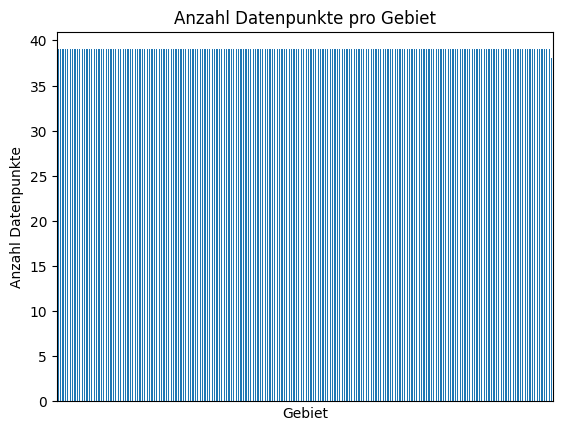

In [93]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [94]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  197


In [95]:
# Anzahl Datenpunkte pro Gebiet
df['Code'].value_counts()

Code
AFG    39
NZL    39
NER    39
NGA    39
PRK    39
       ..
GRC    39
GRD    39
GTM    39
ZWE    39
KIR    38
Name: count, Length: 196, dtype: int64

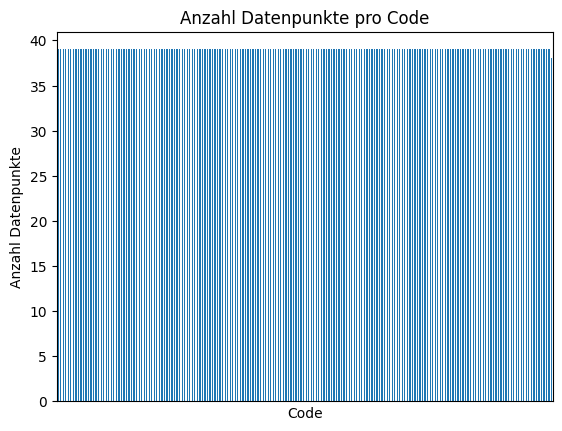

In [96]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [97]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  39


In [98]:
# Anzahl Datenpunkte pro Jahr
df['Jahr'].value_counts().sort_index()

Jahr
1985    205
1986    206
1987    206
1988    206
1989    206
1990    206
1991    206
1992    206
1993    206
1994    206
1995    206
1996    206
1997    206
1998    206
1999    206
2000    206
2001    206
2002    206
2003    206
2004    206
2005    206
2006    206
2007    206
2008    206
2009    206
2010    206
2011    206
2012    206
2013    206
2014    206
2015    206
2016    206
2017    206
2018    206
2019    206
2020    206
2021    206
2022    206
2023    206
Name: count, dtype: int64

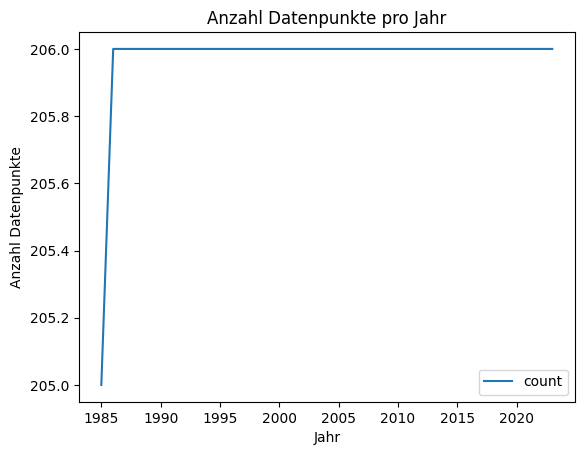

In [99]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.legend()  # Legende anzeigen

### 3.4 Analyse Todesfälle

In [100]:
df.describe()

,Jahr,Todesfälle
count,8033.000000,8033.000000
mean,2004.002365,8121.115588
std,11.254033,42334.803424
min,1985.000000,0.000191
25%,1994.000000,7.512231
50%,2004.000000,98.836500
75%,2014.000000,1443.435400
max,2023.000000,625290.000000


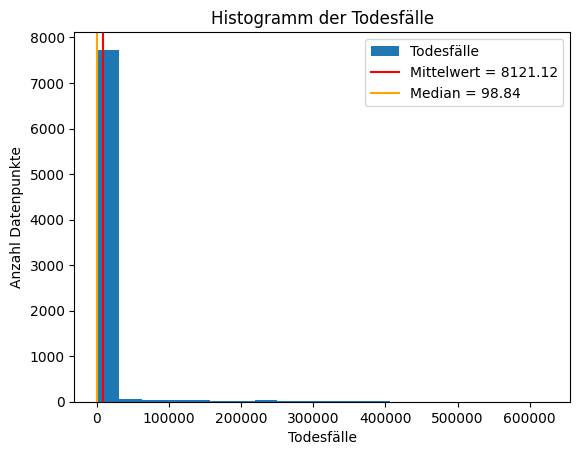

In [101]:
g = df['Todesfälle'].plot(kind='hist', bins=20, title='Histogramm der Todesfälle', 
                           xlabel='Todesfälle', ylabel='Anzahl Datenpunkte')
mean = df['Todesfälle'].mean()
g.axvline(x=df['Todesfälle'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Todesfälle'].median()
g.axvline(x=df['Todesfälle'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()




## 4. Analyse 

### Vorgehen

### Beobachtungen
- Afrikanische Länder sind an der Spitze in der Zunahme der Lebenserwartung. Eine Zunahme der Lebenserwartung von mehr als 5 Jahren haben: Uganda, Tanzania, Malawi, Zimbabwe, Lesotho, Swasiland
- Eine Reduktion der Lebenserwartung von mehr als 4 Jahren haben: Saint Vincent and the Grenadines, Mexiko, Kuba, Oman


### Interpretation

Corona führte bei allen Ländern zu einer Reduktion der Lebenserwartung (siehe Plot)

Länder (in Afrika) mit starker Zunahme der Lebensqualität:
- Bei den afrikanischen Ländern stieg die Lebenserwartung in den letzten Jahren sehr stark, da die Lebenserwartung sehr tief war. Zudem ist der Effekt von Corona auf die Lebenserwartung in den afrikanischen Ländern eher kleiner weil die Bevölkerung jünger ist
- Bei einigen afrikanischen Ländern hat sich die Lebenserwartung zwischen 1990 und 2000 stark verringert wegen HIV. Siehe Beispielsweise: https://life4me.plus/pl/news/life-expectancy-in-zimbabwe-shoots-up-hiv-infection-drop/


Länder mit einer starken Reduktion der Lebensqualität:
- Hier war die Lebenserwartung in den Jahren vor Corona konstant. Corona führte dann zu einer Reduktion der Lebenserwartung


### Berechnungen

In [102]:
diffs = df_pivot[1985]-df_pivot[2020]   # Differenz zwischen 2021 und 2011
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz und NaN-Werte entfernen
diffs

Gebiet
Nigeria                          -24500.15600
Democratic Republic of Congo      -6243.45100
Chad                              -3803.26520
Central African Republic          -1921.39383
Madagascar                         -805.20600
                                     ...     
Upper-middle-income countries     62586.27800
India                            156336.45700
Lower-middle-income countries    232911.76000
Asia                             272841.21000
World                            342367.80000
Length: 205, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der Todesfälle 2011-2021'}, ylabel='Gebiet'>

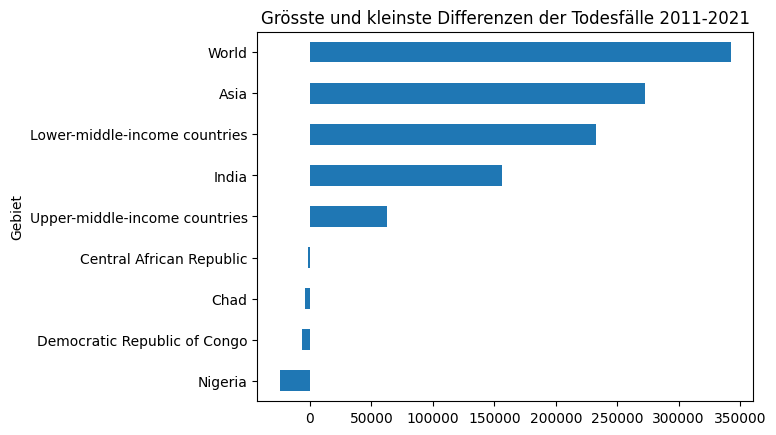

In [103]:
diff_sel = (diffs < -1152) | (diffs > 59745)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Todesfälle 2011-2021')

In [104]:
Gebiets_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['Nigeria', 'Democratic Republic of Congo', 'Chad', 'Central African Republic', 'Upper-middle-income countries', 'India', 'Lower-middle-income countries', 'Asia', 'World']


### Visualisierung

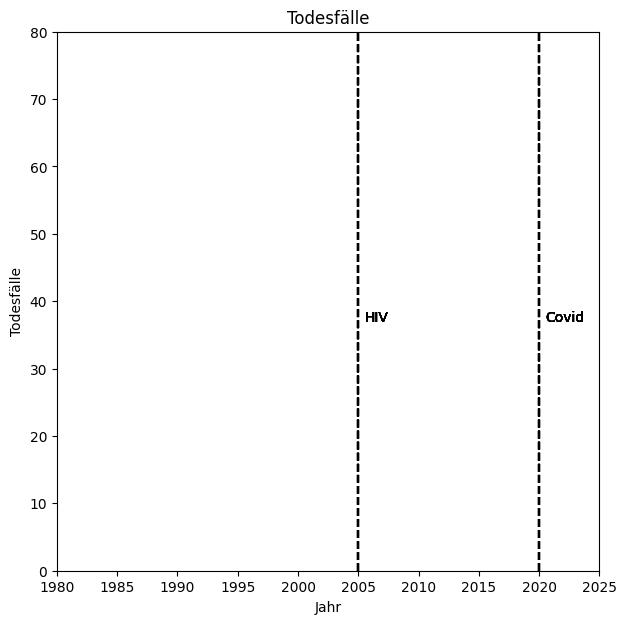

In [105]:
for gebiet in Gebiets_liste:
    diff = diffs[gebiet]

    g = df_pivot.loc[gebiet].plot(
        title='Todesfälle',
        xlabel='Jahr',
        ylabel='Todesfälle',
        label=f'{gebiet} – Diff. 2021–2011: {diff:.2f}',
        xlim=[1980, 2025],
        ylim=[0, 80],
        color=color_dict.get(gebiet, 'black'),
        figsize=(7, 7)
    )

    g.axvline(2020, color='black', linestyle='--')
    g.text(2020.5, 37, 'Covid')

    g.axvline(2005, color='black', linestyle='--')
    g.text(2005.5, 37, 'HIV')



In [106]:
df_pivot.columns = df_pivot.columns.astype(int)


In [107]:
df_pivot.loc[Gebiets_liste[0]].head()
df_pivot.columns


Index([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023],
      dtype='int64', name='Jahr')

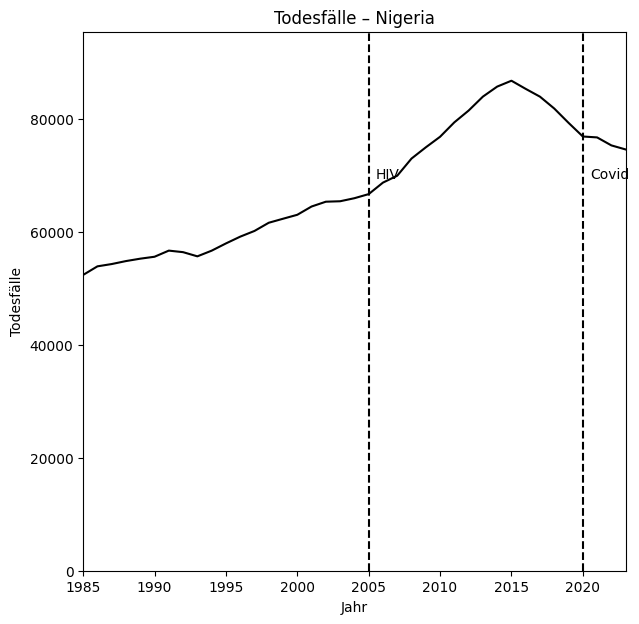

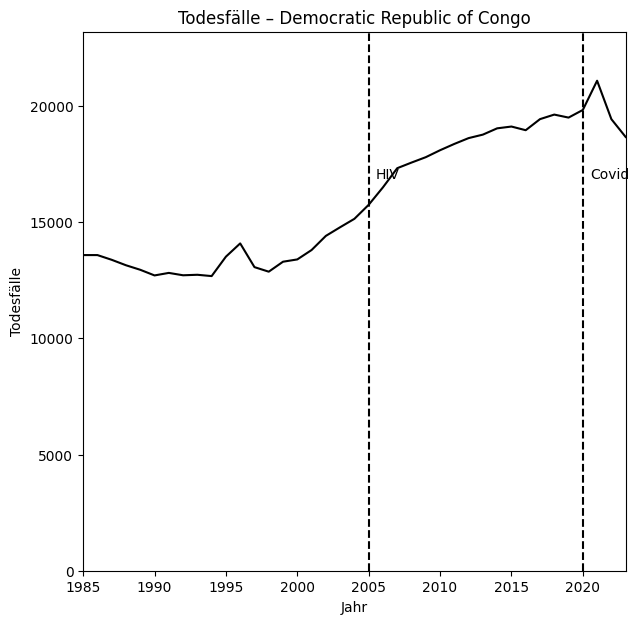

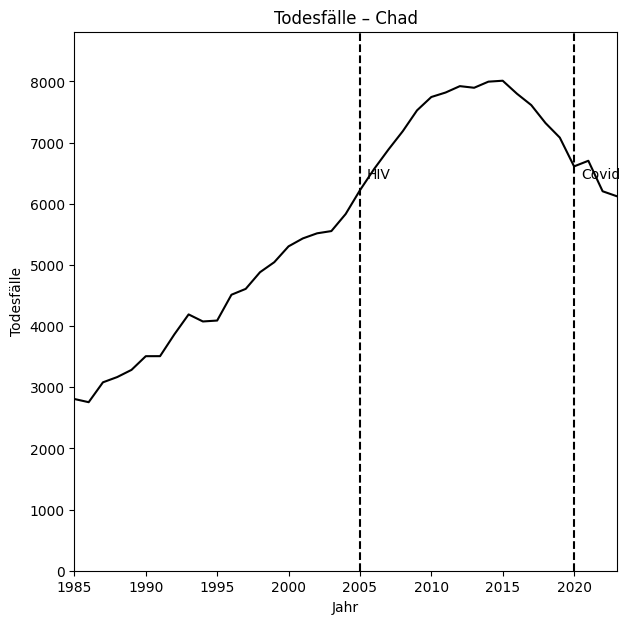

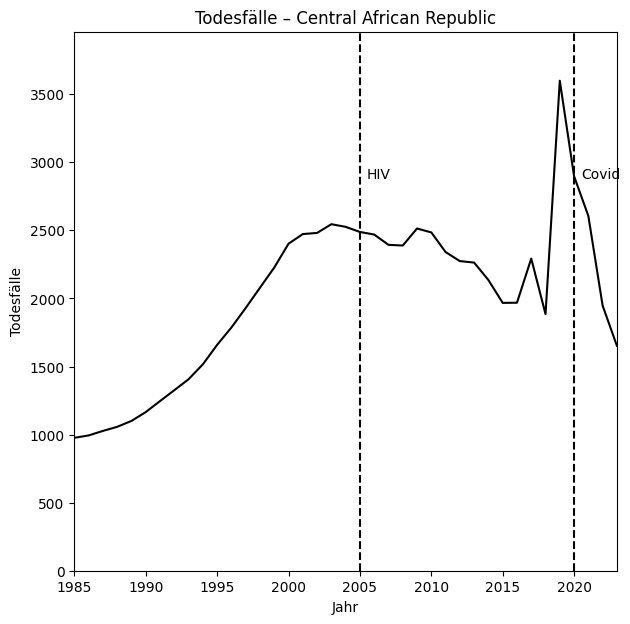

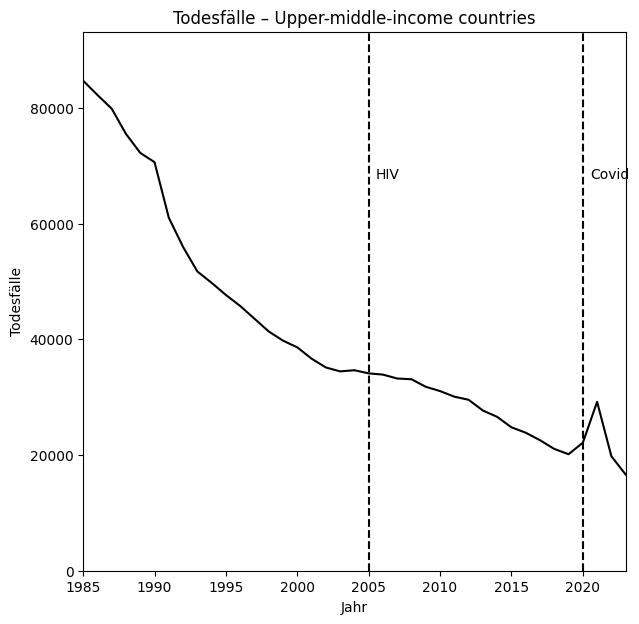

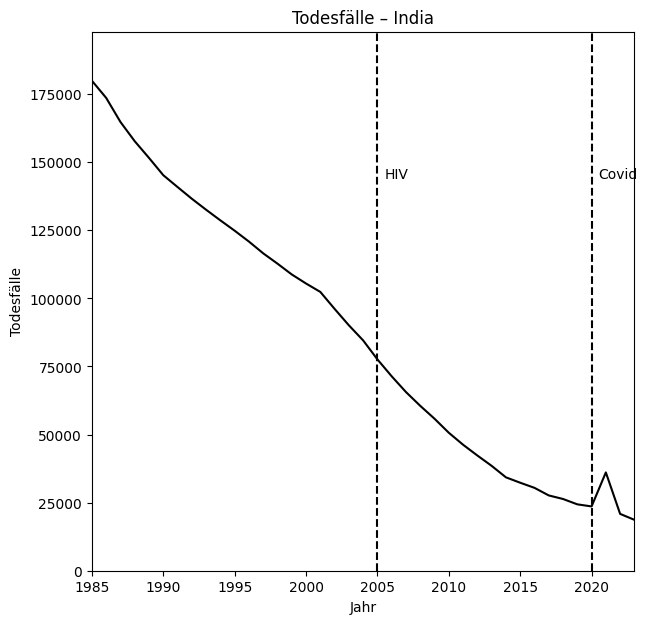

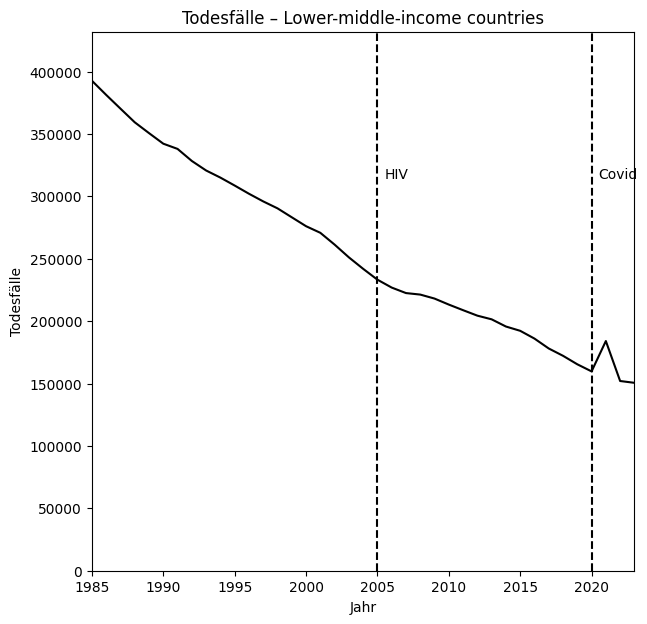

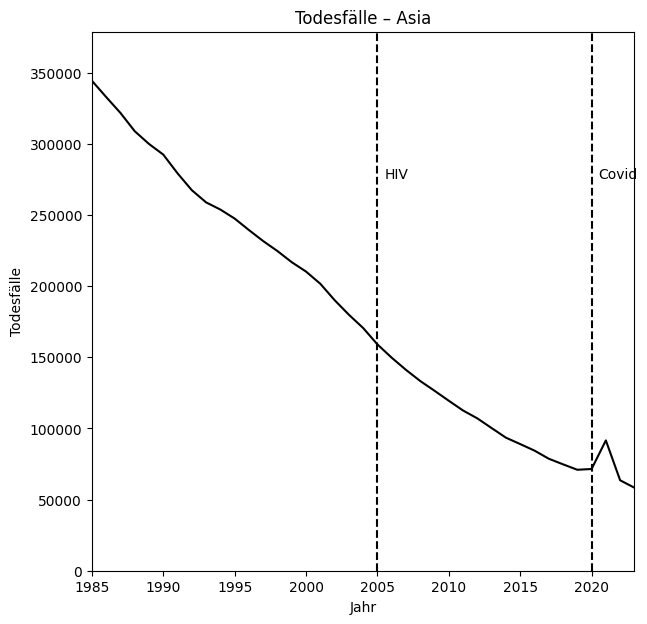

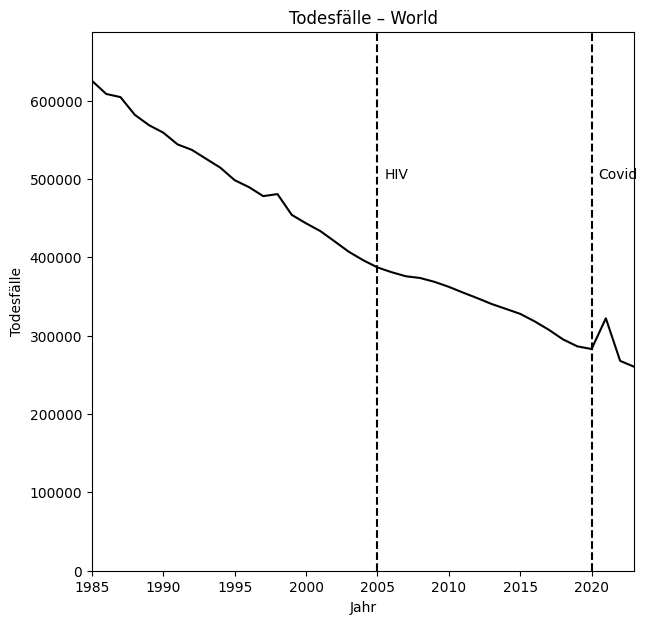

In [108]:
for gebiet in Gebiets_liste:
    s = df_pivot.loc[gebiet]

    if s.isna().all():
        print(f'Keine Daten für: {gebiet}')
        continue

    g = s.plot(
        title=f'Todesfälle – {gebiet}',
        xlabel='Jahr',
        ylabel='Todesfälle',
        color=color_dict.get(gebiet, 'black'),
        xlim=(1985, 2023),
        ylim=(0, s.max() * 1.1),
        figsize=(7, 7)
    )

    g.axvline(2020, color='black', linestyle='--')
    g.text(2020.5, s.max()*0.8, 'Covid')

    g.axvline(2005, color='black', linestyle='--')
    g.text(2005.5, s.max()*0.8, 'HIV')

    plt.show()


## Besteht ein Zusammen hang zwischen der Lebenserwartung von Frauen und der Zahl der Müttersterbefälle?

Datensätze kompatibel machen

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

life = pd.read_csv("life-expectancy-of-women-vs-life-expectancy-of-men.csv")
maternal = pd.read_csv("number-of-maternal-deaths-by-region.csv")


Wir reduzieren die Datensätze bewusst auf das Notwendigste:

In [110]:
maternal.columns


Index(['Entity', 'Code', 'Year', 'Estimated maternal deaths',
       '1104682-annotations'],
      dtype='object')

In [111]:
life = life[[
    'Entity',
    'Year',
    'Life expectancy - Sex: female - Age: 0 - Variant: estimates'
]]


In [112]:
maternal = maternal[[
    'Entity',
    'Year',
    'Estimated maternal deaths'
]]


Datensätze Zusammenführen

In [113]:
import pandas as pd

df = pd.merge(
    life,
    maternal,
    on=['Entity', 'Year'],
    how='inner'
)


In [114]:
df.head()


,Entity,Year,Life expectancy - Sex: female - Age: 0 - Variant: estimates,Estimated maternal deaths
0,Afghanistan,1985,37.101,13181.217
1,Afghanistan,1986,42.072,11068.511
2,Afghanistan,1987,42.603,10826.929
3,Afghanistan,1988,45.962,9364.836
4,Afghanistan,1989,47.042,9327.983


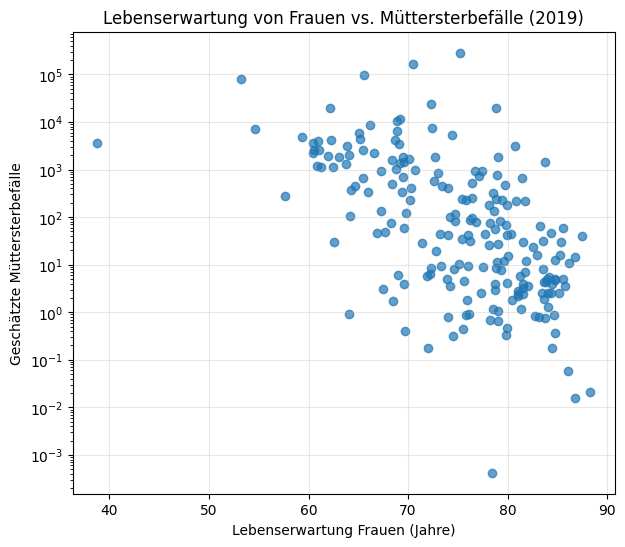

In [115]:
import matplotlib.pyplot as plt

df_2019 = df[df['Year'] == 2019].dropna()

plt.figure(figsize=(7, 6))
plt.scatter(
    df_2019['Life expectancy - Sex: female - Age: 0 - Variant: estimates'],
    df_2019['Estimated maternal deaths'],
    alpha=0.7
)

plt.xlabel('Lebenserwartung Frauen (Jahre)')
plt.ylabel('Geschätzte Müttersterbefälle')
plt.title('Lebenserwartung von Frauen vs. Müttersterbefälle (2019)')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()


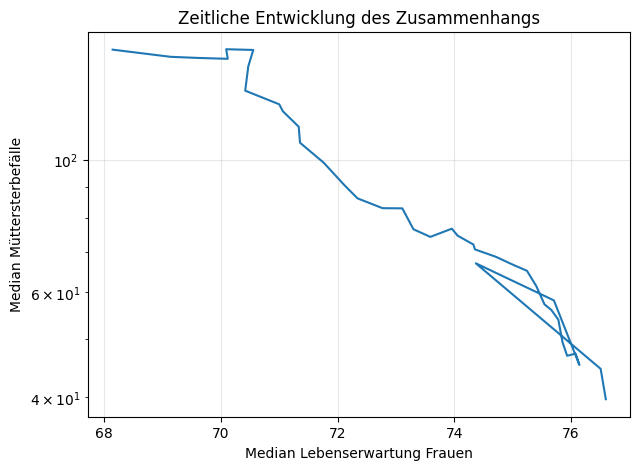

In [116]:
df_time = (
    df
    .dropna()
    .groupby('Year')
    .median(numeric_only=True)
)

plt.figure(figsize=(7, 5))
plt.plot(
    df_time['Life expectancy - Sex: female - Age: 0 - Variant: estimates'],
    df_time['Estimated maternal deaths']
)

plt.xlabel('Median Lebenserwartung Frauen')
plt.ylabel('Median Müttersterbefälle')
plt.title('Zeitliche Entwicklung des Zusammenhangs')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()


## Zeitliche Entwicklung und Zusammenhang zwischen Müttersterblichkeit und Lebenserwartung von Frauen

Die Grafik zeigt für Länder weltweit den Zusammenhang zwischen der Lebenserwartung von Frauen bei Geburt und der Anzahl der geschätzten Müttersterbefälle, ergänzt um eine zeitliche Perspektive (mehrere Jahre bzw. Vergleich früherer und späterer Zeitpunkte).

### Zentrale Beobachtungen

1. **Negativer Zusammenhang**
   Es besteht ein klarer inverser Zusammenhang zwischen der Lebenserwartung von Frauen und der Müttersterblichkeit: Länder mit höherer weiblicher Lebenserwartung weisen systematisch deutlich geringere Müttersterbefälle auf. Dieser Zusammenhang ist robust über die Zeit hinweg.

2. **Zeitliche Verschiebung der Punktwolke**
   Über die Zeit verschiebt sich die Punktwolke:
   - nach **rechts** (steigende Lebenserwartung von Frauen),
   - nach **unten** (sinkende Müttersterblichkeit).
   
   Dies deutet auf einen globalen Fortschritt in der Gesundheitsversorgung, insbesondere im Bereich der reproduktiven und geburtshilflichen Versorgung, hin.

3. **Abnehmende Streuung**
   In früheren Jahren ist die Streuung groß: Länder unterscheiden sich stark sowohl in der Lebenserwartung als auch in der Müttersterblichkeit. In späteren Jahren nimmt diese Streuung ab, was auf eine **partielle Konvergenz** der gesundheitlichen Lebensbedingungen hindeutet – wenn auch auf weiterhin sehr unterschiedlichen Niveaus.

4. **Persistente Ungleichheiten**
   Trotz des globalen Fortschritts verbleiben Länder mit niedriger Lebenserwartung von Frauen in einem Bereich hoher Müttersterblichkeit. Diese Länder liegen überproportional in einkommensschwachen Regionen mit eingeschränktem Zugang zu qualitativ hochwertiger Gesundheitsversorgung.

### Interpretation

Der beobachtete Zusammenhang ist konsistent mit etabliertem demografischem und epidemiologischem Wissen: Verbesserungen in der allgemeinen Gesundheit, im Bildungsniveau von Frauen sowie im Zugang zu medizinischer Versorgung erhöhen die Lebenserwartung und reduzieren gleichzeitig Risiken rund um Schwangerschaft und Geburt. Die Grafik liefert jedoch **keinen kausalen Beweis**, sondern eine explorative Evidenz für einen strukturellen Zusammenhang zwischen beiden Größen.

### Fazit

Die zeitliche Entwicklung zeigt einen klaren globalen Trend hin zu höherer Lebenserwartung von Frauen und geringerer Müttersterblichkeit. Gleichzeitig macht die anhaltende Streuung deutlich, dass erhebliche regionale und strukturelle Ungleichheiten fortbestehen. Die Grafik eignet sich daher sowohl zur Illustration globaler Fortschritte als auch zur Sichtbarmachung verbleibender gesundheitlicher Disparitäten.
